LL_RT

(0.0, 100.0)

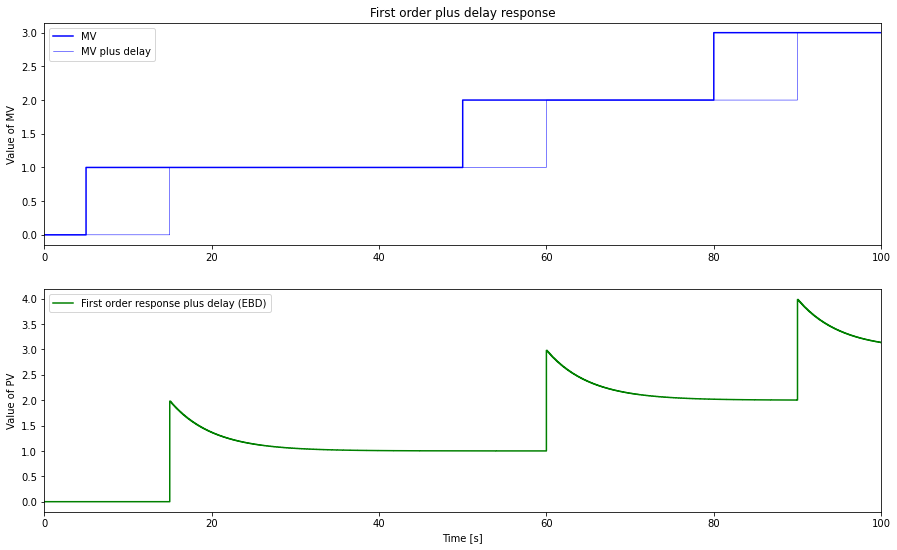

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_JM_RS import LL_RT


TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
Tlead = 10
Tlag = 5
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    LL_RT(MVDelay,Kp,Tlead,Tlag,Ts,PV_EBD)

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])   

# PID_RT

(0.0, 40.0)

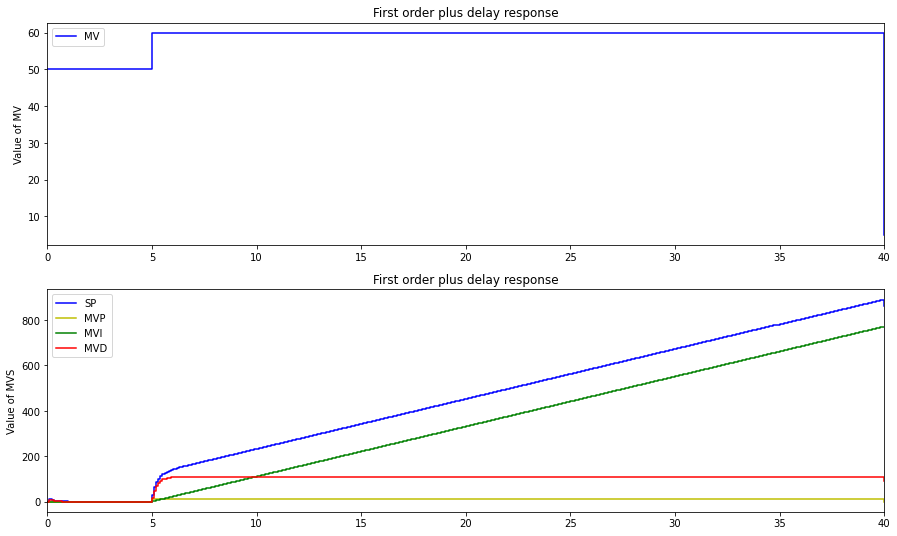

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode
from package_JM_RS import LL_RT, PID_RT


TSim = 40
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
SPPath = {0: 50, 5: 60, TSim: 5}
PVPath = {0: 50, 5: 50, TSim: 5}
SP = []
PV = []

t = []
MV = []
MVP = []
MVI = []
MVD = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []
E = []

# Parameters
Kp = 1
Tlead = 10
Tlag = 5
theta = 10



for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(SPPath,t,SP)
    SelectPath_RT(PVPath,t,PV)
    # PID_RT(SP,PV,Man,MVMan,MVFF,Kc,Ti,Td,alpha, Ts,MVMin,MVMax,MV,MV_P,MV_I,MV_D, E ,MV_FF = False, PVInit = 0,E_init = 0,MV_P_Init = 0,MV_I_Init = 0,MV_D_Init = 0, Method = 'EBD-EBD')
    PID_RT(SP,PV,False,10,10,1.1,10,5,0.5, 1,0,100,MV,MVP,MVI,MVD,E,False,0,5,MV_P_Init = 0,MV_I_Init = 0,MV_D_Init = 0, Method = 'EBD-EBD')

    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,SP,'b-',label='MV',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MV,'b-',label='SP',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVP,'y-',label='MVP',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVI,'g-',label='MVI',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MVI')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,MVD,'r-',label='MVD',where='post')
#plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MVS')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])
 